<a href="https://colab.research.google.com/github/pranayDgr8/Computer-Vision-Implementations/blob/main/Denoising_image_CVHC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
name='/content/drive/MyDrive/brain MRI/yes/Y101.jpg'
image=cv2.imread(name)

In [ ]:
image

array([[[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [ 22,  22,  22],
        [  7,   7,   7],
        ...,
        [ 12,  12,  12],
        [ 21,  21,  21],
        [255, 255, 255]],

       [[255, 255, 255],
        [  7,   7,   7],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 12,  12,  12],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [  8,   8,   8],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 12,  12,  12],
        [255, 255, 255]],

       [[254, 254, 254],
        [ 24,  24,  24],
        [  8,   8,   8],
        ...,
        [ 10,  10,  10],
        [ 20,  20,  20],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

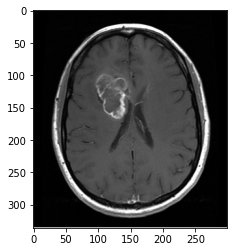

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image,cmap='gray')

In [ ]:
image.shape

(336, 300, 3)

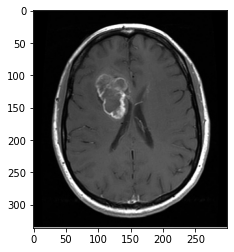

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [ ]:
from PIL import Image

img = Image.open(name)
imgGray = img.convert('L')
imgGray.save('test_gray.png')
imgGray.show()

In [ ]:
img=cv2.imread('/content/test_gray.png')
img.shape

(336, 300, 3)

In [ ]:
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper 
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

   elif noise_typ == "poisson":
    
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy

   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy
  
 

In [ ]:
import numpy as np
import random


def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('/content/test_gray.png',0) # Only for grayscale image
noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.jpg', noise_img)

True

## **S&P noise**

True

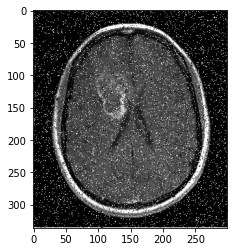

In [ ]:
plt.imshow(noise_img,cmap='gray')
cv2.imwrite('saltnppr.jpg', noise_img)

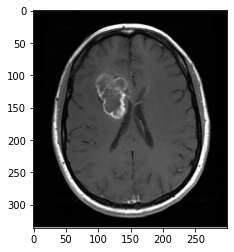

In [ ]:
plt.imshow(noisy("poisson",gray),cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


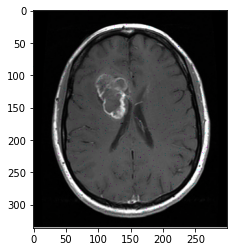

In [ ]:
plt.imshow(noisy("s&p",image),cmap='gray')

In [ ]:
noisy_img=noisy("s&p",image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


applying median filter on snp **noise**

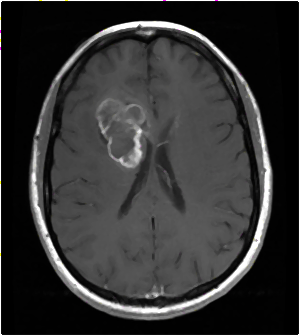

In [ ]:
from google.colab.patches import cv2_imshow
median_blur= cv2.medianBlur(noisy_img, 3)
cv2_imshow(median_blur)  



**SPECKLE NOISE**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


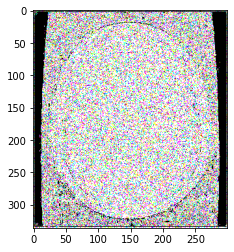

In [ ]:
plt.imshow(noisy("speckle",image),cmap='gray')

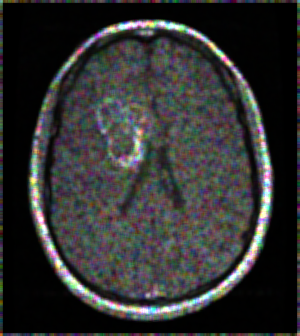

In [ ]:
spkl_img=noisy("speckle",image)
median_blur= cv2.GaussianBlur(spkl_img,(5,5), 3)
cv2_imshow(median_blur)           

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


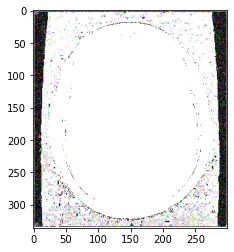

In [ ]:
plt.imshow(noisy("gauss",image),cmap='gray')

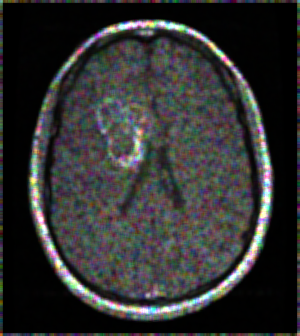

In [ ]:
gauss_img=noisy("gauss",image)
median_blur= cv2.GaussianBlur(spkl_img,(5,5), 3)
cv2_imshow(median_blur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


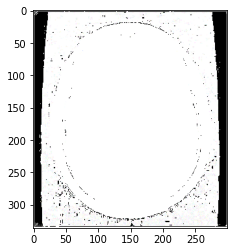

In [ ]:
plt.imshow(noisy("poisson",image),cmap='gray')

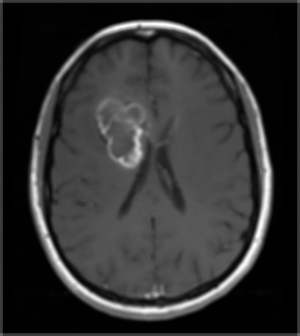

In [ ]:
poisn_img=noisy("poisson",image)
poisn_img.shape


median_blur= cv2.GaussianBlur(poisn_img,(5,5), 3)
cv2_imshow(median_blur)
